In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
#returns columns contained in the dataset
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# describe gives a summary statistic of the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# checking for null values
df.isna()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [9]:
# returning a dataframe with rows containing null values
# no null value found
null = df[df.isnull().any(axis=1)]
null

,TV,Radio,Newspaper,Sales


In [10]:
# checking for correlations in our dataset
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


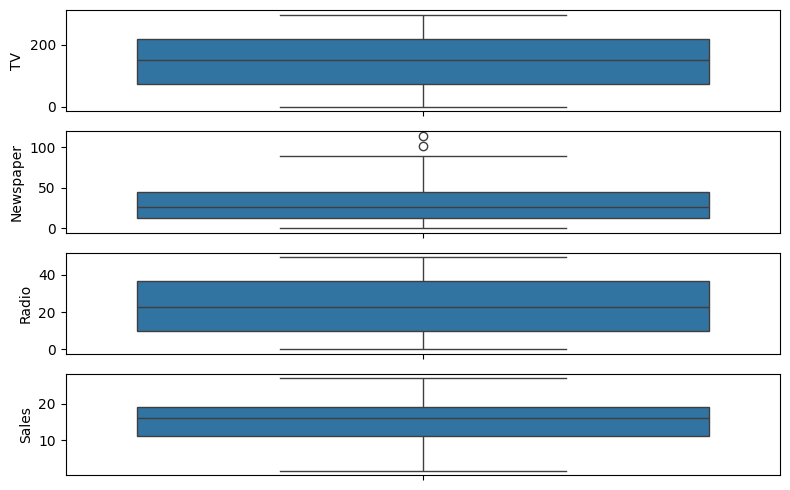

In [11]:
#  boxplot used to check for outliers in the dataset

_, axs = plt.subplots(4, figsize =(8,5))
sns.boxplot(df['TV'], ax = axs[0])
sns.boxplot(df['Newspaper'], ax = axs[1])
sns.boxplot(df['Radio'], ax = axs[2])
sns.boxplot(df['Sales'], ax=axs[3])
plt.tight_layout()

In [12]:
Q1 = df['Newspaper'].quantile(0.25)
print('Q1: ', Q1)

Q3 = df['Newspaper'].quantile(0.75)
print('Q3: ', Q3)

Q1:  12.75
Q3:  45.1


In [13]:
# handling outliers 
IQR = Q3 - Q1 #( interquartile range for newspaper column)
Lower_bound = Q1 - 1.5 * (IQR)
Upper_bound = Q3 + 1.5 * (IQR)

print("Lower limit for Newspaper cost", Lower_bound,",", "Upper limit for Newspaper cost", Upper_bound)

Lower limit for Newspaper cost -35.775000000000006 , Upper limit for Newspaper cost 93.625


In [14]:
index_list = df.index[(df['Newspaper']< Lower_bound) | (df['Newspaper']>Upper_bound)]

In [15]:
index_list

Index([16, 101], dtype='int64')

In [16]:
df = df.drop(index_list)
print(df.shape)

(198, 4)


<Axes: ylabel='Newspaper'>

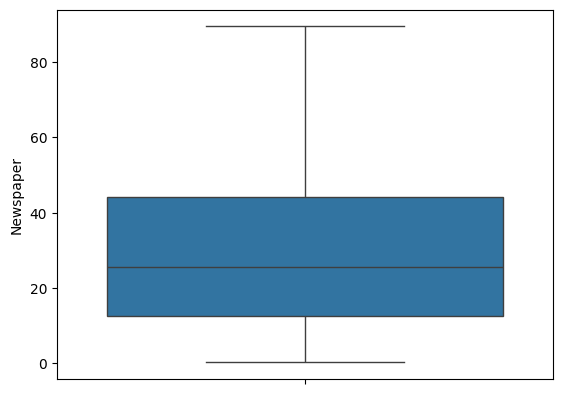

In [17]:
sns.boxplot(df['Newspaper'])

no more outlier is found after handling the outlier earlier found in Newspaper

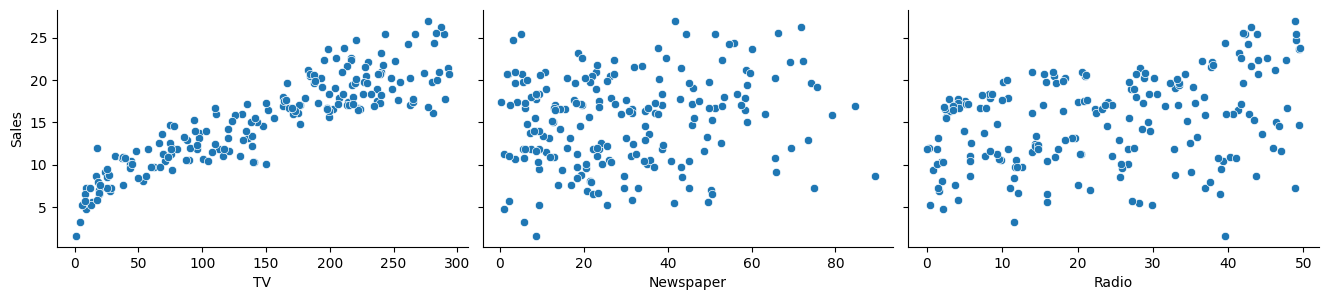

In [18]:
# relationship between sales and newspaper, tv, radio
sns.pairplot(df, x_vars= ['TV', 'Newspaper', 'Radio'], y_vars = ['Sales'], kind = 'scatter', height = 3, aspect = 1.5)

From the above pairplot, sales and TV is seen to have a strong correlation

Axes(0.125,0.11;0.62x0.77)


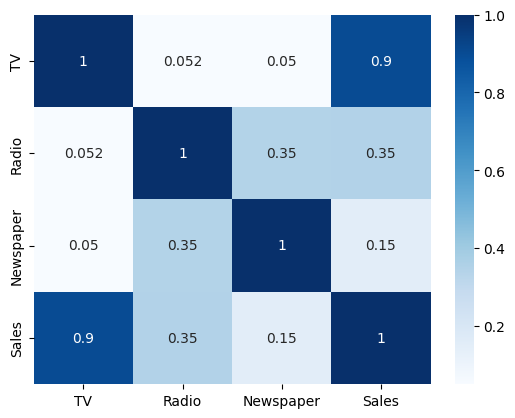

In [19]:
# correlation heatmap showing correlation between sales, Tv, Newspaper and Radio

mymatrix = df.corr()
heat_map = sns.heatmap(mymatrix, annot = True, cmap = "Blues")
print(heat_map)

 According to the pairplot and heatmap, TV and sales has the highest correlation

MODEL BUILDING

 Simple Linear Regression
 
 y = mx + c

In [20]:
# modelling

x = df.drop(columns=['Sales'])
y = df['Sales']

In [21]:
# importing the library
from sklearn.model_selection import train_test_split

# splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)

In [22]:
x_train.shape

(158, 3)

In [23]:
x_train.head()

,TV,Radio,Newspaper
109,255.4,26.9,5.5
108,13.1,0.4,25.6
57,136.2,19.2,16.6
14,204.1,32.9,46.0
115,75.1,35.0,52.7


In [24]:
y_train.shape

(158,)

In [25]:
y_train.head()

109    19.8
108     5.3
57     13.2
14     19.0
115    12.6
Name: Sales, dtype: float64

1) Linear Regression 

In [26]:
# training the linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [27]:

model.intercept_

4.499058011650241

In [28]:
model.coef_

array([ 0.05668794,  0.10516089, -0.001864  ])

In [29]:
# making predictions
y_pred = model.predict(x_test)

In [30]:
y_pred

array([14.90198809, 17.97306098, 21.39355855,  6.21656262, 23.35587432,
       21.07046492, 16.05766097, 15.77511824, 23.99848496, 21.71821592,
       22.38997665, 15.32693494, 19.18636469, 17.62366389,  9.70776175,
        7.23981126,  9.61195155, 24.22579697, 16.07413365, 19.52811865,
       21.07772373, 24.51140536, 16.73252093, 12.03927797, 10.11094746,
       12.57828154, 21.32882666, 10.10774998, 14.76809069, 21.41019276,
       18.94708721,  9.42755944,  7.70229519, 12.63540606, 21.80413198,
       20.7673291 ,  9.62209474, 20.38230501, 11.84153989, 15.24125957])

In [31]:
y_test

177    16.7
41     17.1
35     17.8
91      7.3
147    25.4
184    17.6
96     16.7
4      17.9
30     21.4
169    20.0
54     20.2
19     14.6
11     17.4
163    18.0
149    10.1
119     6.6
107    12.0
36     25.4
112    17.1
59     18.4
52     22.6
17     24.4
45     16.1
94     11.5
32     13.2
186    10.3
39     21.5
29     10.5
173    16.7
28     18.9
48     19.8
166     8.0
60      8.1
145    10.3
150    16.1
124    19.7
138     9.6
178    16.8
79     11.0
120    15.5
Name: Sales, dtype: float64

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 1.536063593892215
Mean Squared Error (MSE): 3.7799174498834995
R-squared (R²): 0.8455281512494895


ALTERNATIVELY

In [33]:
# import library
from sklearn.metrics import mean_absolute_error
from sklearn import metrics as m

In [34]:
mae = mean_absolute_error

m.mean_absolute_error(y_test, y_pred)

1.536063593892215

In [35]:
mse = mean_squared_error

m.mean_squared_error(y_test,y_pred)

3.7799174498834995

In [36]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

1.9442009798072573

In [37]:
# accuracy on testing dataset
m.r2_score(y_test, y_pred)

0.8455281512494895

In [38]:
y_train_predict = model.predict(x_train)

In [39]:
y_train_predict.shape

(158,)

In [40]:
np.sqrt(m.mean_squared_error(y_train,y_train_predict))

1.5872280108885717

In [41]:
m.r2_score(y_train,y_train_predict)

0.910712751480645

In [42]:
model.coef_

array([ 0.05668794,  0.10516089, -0.001864  ])

In [43]:
model.intercept_

4.499058011650241

2) Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [45]:
#regularization parameter alpha
model_ridge = Ridge(alpha = 0.1)

#training the model
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [46]:
#making predictions
y_predict_ridge = model_ridge.predict(x_test)

y_predict_ridge

array([14.90199393, 17.97305831, 21.39356265,  6.21657109, 23.35586649,
       21.07046525, 16.05766548, 15.77512512, 23.99848391, 21.71821762,
       22.38997307, 15.32693388, 19.1863619 , 17.62365725,  9.70776066,
        7.23981382,  9.61195925, 24.22578722, 16.07413385, 19.52811447,
       21.0777181 , 24.51140163, 16.73252136, 12.03927975, 10.11095533,
       12.5782887 , 21.32882166, 10.10775398, 14.76809474, 21.41019047,
       18.94709137,  9.42755451,  7.70230231, 12.63541167, 21.80413537,
       20.7673298 ,  9.62209362, 20.38231118, 11.84154491, 15.24126002])

In [47]:
model_ridge.intercept_

4.4990641188673095

In [65]:
model_ridge.coef_

array([ 0.05668794,  0.10516055, -0.00186391])

In [48]:
# evaluating the model using MAE, MSE and R- Squared

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 1.536063593892215
Mean Squared Error (MSE): 3.7799174498834995
R-squared (R²): 0.8455281512494895


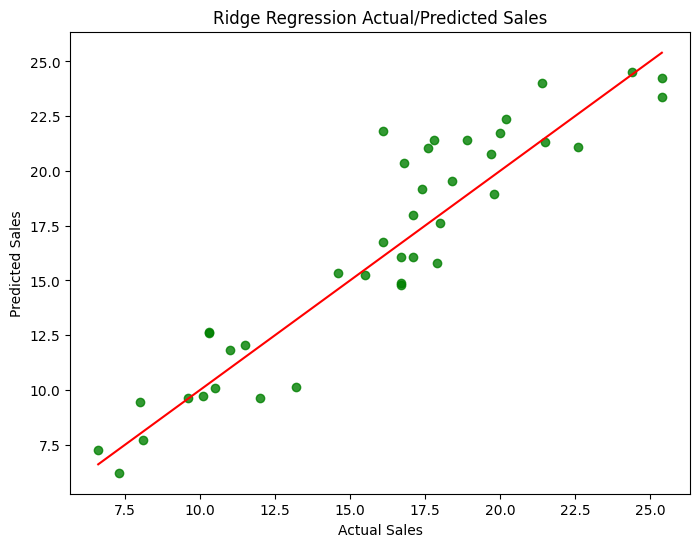

In [49]:
# Plot the actual vs predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='solid')
plt.title('Ridge Regression Actual/Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


3) Elastic Net Regression 

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
# initialize elastic model
EN_model = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
# l1_ratio = equal mix of lasso and ridge

In [52]:
# train the model
EN_model.fit(x_train, y_train)


ElasticNet()

In [53]:
# model intercept
EN_model.intercept_

4.5355320632924485

In [66]:
EN_model.coef_

array([ 0.05660326,  0.10175601, -0.        ])

In [55]:
#model evaluation
# evaluating the model using MAE, MSE and R- Squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared (R²): {r2}')

Mean Absolute Error (MAE): 1.536063593892215
Mean Squared Error (MSE): 3.7799174498834995
R-Squared (R²): 0.8455281512494895


4) Least Squares method (Ordinary Least Squares)

In [56]:
import statsmodels.api as sm

In [57]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(df, columns=['Radio', 'Newspaper'], drop_first=True)

# Check the resulting dataframe
print(data_encoded.head())


      TV  Sales  Radio_0.3  Radio_0.4  Radio_0.8  Radio_1.3  Radio_1.4  \
0  230.1   22.1      False      False      False      False      False   
1   44.5   10.4      False      False      False      False      False   
2   17.2   12.0      False      False      False      False      False   
3  151.5   16.5      False      False      False      False      False   
4  180.8   17.9      False      False      False      False      False   

   Radio_1.5  Radio_1.6  Radio_1.9  ...  Newspaper_69.3  Newspaper_71.8  \
0      False      False      False  ...           False           False   
1      False      False      False  ...           False           False   
2      False      False      False  ...            True           False   
3      False      False      False  ...           False           False   
4      False      False      False  ...           False           False   

   Newspaper_72.3  Newspaper_73.4  Newspaper_74.2  Newspaper_75.0  \
0           False           False  

In [58]:
# Features (X) and target (y)
X = data_encoded.drop('Sales', axis=1)
y = data_encoded['Sales']

In [59]:
#  adding intercept
x = sm.add_constant(x)

In [60]:
# fitting the model
model_ols = sm.OLS(y, x).fit()

In [61]:
# regression results summary of the dataset
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     590.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           3.02e-97
Time:                        23:03:32   Log-Likelihood:                -380.34
No. Observations:                 198   AIC:                             768.7
Df Residuals:                     194   BIC:                             781.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6002      0.314     14.673      0.0



From the above, the dependent variable is Sales

The R Squared for the model is 0.9 which is good, since a value close to 1 is very good

The p-value of less than 0.05 means that the model is statistically significant.

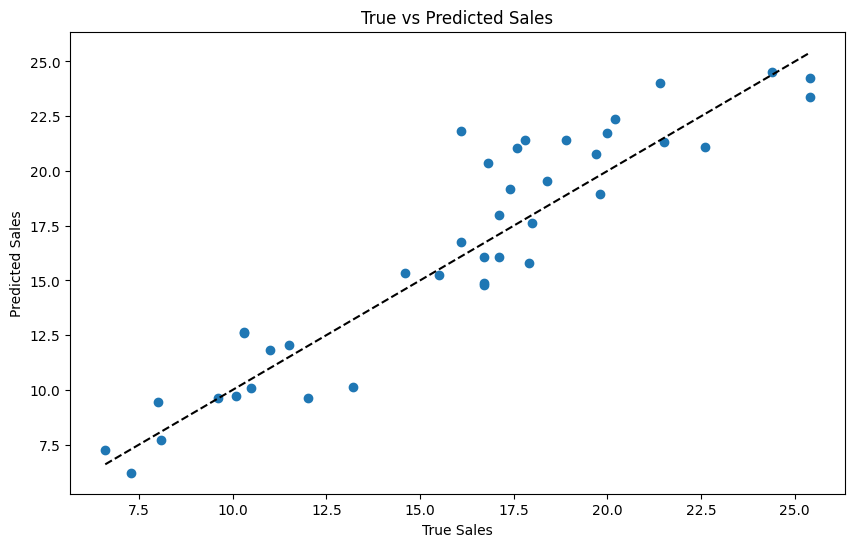

In [62]:
# Plotting the actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color = 'black')
plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')
plt.title('True vs Predicted Sales')
plt.show()


# INTERPRETATION



We have Intercept = 4.49,coefficients of TV = 0.056688, coefficients of Radio = 0.105161, coefficients of Newspaper = - 0.001864


Sales = 4.49+(0.056688⋅TV)−(0.105161⋅Radio)+(0.001864⋅Newspaper)


This equation represents the linear regression model that predicts Sales based on three independent variables.


These variables are: TV, Radio, and Newspaper advertising expenditures.


Here’s how to interpret the coefficients and the equation


Intercept (4.49): The intercept of 4.49 means that if the values of TV, Radio, and Newspaper are all zero (i.e., no advertising expenditure),
the model predicts a baseline Sales value of 4.49 units. This is the starting point of the equation.


Coefficient for TV (0.056688): The coefficient of 0.056688 for TV means that for every 1 unit increase in the TV advertising expenditure,
Sales are expected to increase by 0.056688 units, assuming all other factors (Radio and Newspaper spending) remain constant.


If you increase the TV budget, this will lead to a small increase in sales.


Coefficient for Radio (-0.105161): The coefficient of -0.105161 for Radio means that for every 1 unit increase in Radio advertising expenditure,
Sales are expected to decrease by 0.105161 units, assuming all other factors (TV and Newspaper spending) remain constant.


This negative relationship suggests that, in this dataset, increasing Radio spend may not be effective in boosting sales, or it may even harm sales,
depending on other factors.


Coefficient for Newspaper (0.001864): The coefficient of 0.001864 for Newspaper means that for every 1 unit increase in the Newspaper advertising expenditure, Sales are expected to increase by 0.001864 units, assuming all other factors remain constant.


This coefficient is quite small compared to TV, indicating that the impact of Newspaper advertising on sales is relatively low, but still positive.

# REPORT


The Sales dataset is a dataset used for regression tasks.

The goal of this task is to predict future sales putting into consideration factors like advertisement.

The dataset was cleaned, preprocessed, data splitting and model training was done .

Four machine learning classification algorithms were used for the task:

Linear Regression

Ridge Regression

Elastic Net Regression

Least Squares method (Ordinary Least Squares)

Each model was trained using training and evaluated using test set.


Each model performed well with the Ordinary Least Squares model performing better than the rest models with R Squared of 0.9 (90%) as compared to the 0.84 (84%) for the other models. 
 

The  Ordinary Least Squares model was best suited for the dataset and gave the best R squared value, therefore it is recommended.
